In [59]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "drugs-a-b-c-x-y-for-decision-trees"

# Project on Drugs A, B, C, X, Y for Decision Trees dataset
## Introduction
The project is on doing classification using Decision Tree algorithm on Drugs A, B, C, X, Y for Decision Trees dataset

## Dataset
The source of the dataset used in this project was sourced from kaggle:https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

### Description about the dataset
This dataset involves patient data collected for a medical study where all individuals were treated for the same illness, responding to one of five medications: Drug A, B, C, X, or Y. The dataset's features include patient attributes such as Age, Sex, Blood Pressure, and Cholesterol, while the target variable is the drug each patient responded to. The task is to build a multiclass classification model, such as a decision tree, to predict which drug would be appropriate for future patients based on their characteristics, aiding in treatment prescription.

## Evaluation
Accuracy was used as a measure of performance


## Steps:
1. Import the data
2. EDA(Exploratory Data Analysis)
3. Clean the dataset
4. Create train/test set
5. Build the model
6. Make prediction
7. Measure performance
8. Tune the hyper-parameters

## 1. Import the data

In [60]:
#Load packages used in this project
required_libraries <- c("tidymodels","readr","rpart.plot","gt")

install.packages(required_libraries)

library(tidymodels)
library(readr)
library(gt)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
#load dataset
#url = "https://raw.githubusercontent.com/ombatii/Project-on-Drugs-A-B-C-X-Y-for-Decision-Trees-dataset/refs/heads/main/drug200.csv"
data <- read.csv("/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv")#url
head(data)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,23,F,HIGH,HIGH,25.355,drugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,drugY
6,22,F,NORMAL,HIGH,8.607,drugX


## 2. EDA

In [62]:
#Number of rows and column
dim(data)

[1] 200   6

In [63]:
str(data)

'data.frame':	200 obs. of  6 variables:
 $ Age        : int  23 47 47 28 61 22 49 41 60 43 ...
 $ Sex        : chr  "F" "M" "M" "F" ...
 $ BP         : chr  "HIGH" "LOW" "LOW" "NORMAL" ...
 $ Cholesterol: chr  "HIGH" "HIGH" "HIGH" "HIGH" ...
 $ Na_to_K    : num  25.4 13.1 10.1 7.8 18 ...
 $ Drug       : chr  "drugY" "drugC" "drugC" "drugX" ...


In [64]:
#Names of column
names_col <- as_tibble(names(data))
names_col

value
<chr>
Age
Sex
BP
Cholesterol
Na_to_K
Drug


In [65]:
#Overview of the columns 
glimpse(data)

Rows: 200
Columns: 6
$ Age         <int> 23, 47, 47, 28, 61, 22, 49, 41, 60, 43, 47, 34, 43, 74, 50…
$ Sex         <chr> "F", "M", "M", "F", "F", "F", "F", "M", "M", "M", "F", "F"…
$ BP          <chr> "HIGH", "LOW", "LOW", "NORMAL", "LOW", "NORMAL", "NORMAL",…
$ Cholesterol <chr> "HIGH", "HIGH", "HIGH", "HIGH", "HIGH", "HIGH", "HIGH", "H…
$ Na_to_K     <dbl> 25.355, 13.093, 10.114, 7.798, 18.043, 8.607, 16.275, 11.0…
$ Drug        <chr> "drugY", "drugC", "drugC", "drugX", "drugY", "drugX", "dru…


In [66]:
#Top rows of the data
data %>% 
  slice_head(n = 10)

Age,Sex,BP,Cholesterol,Na_to_K,Drug
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY
22,F,NORMAL,HIGH,8.607,drugX
49,F,NORMAL,HIGH,16.275,drugY
41,M,LOW,HIGH,11.037,drugC
60,M,NORMAL,HIGH,15.171,drugY


In [67]:
#Bottom rows of the data
data %>% 
  slice_tail(n = 10)

Age,Sex,BP,Cholesterol,Na_to_K,Drug
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
58,M,HIGH,HIGH,18.991,drugY
23,M,HIGH,HIGH,8.011,drugA
72,M,LOW,HIGH,16.310,drugY
72,M,LOW,HIGH,6.769,drugC
46,F,HIGH,HIGH,34.686,drugY
56,F,LOW,HIGH,11.567,drugC
16,M,LOW,HIGH,12.006,drugC
52,M,NORMAL,HIGH,9.894,drugX
23,M,NORMAL,NORMAL,14.020,drugX


In [68]:
install.packages("visdat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



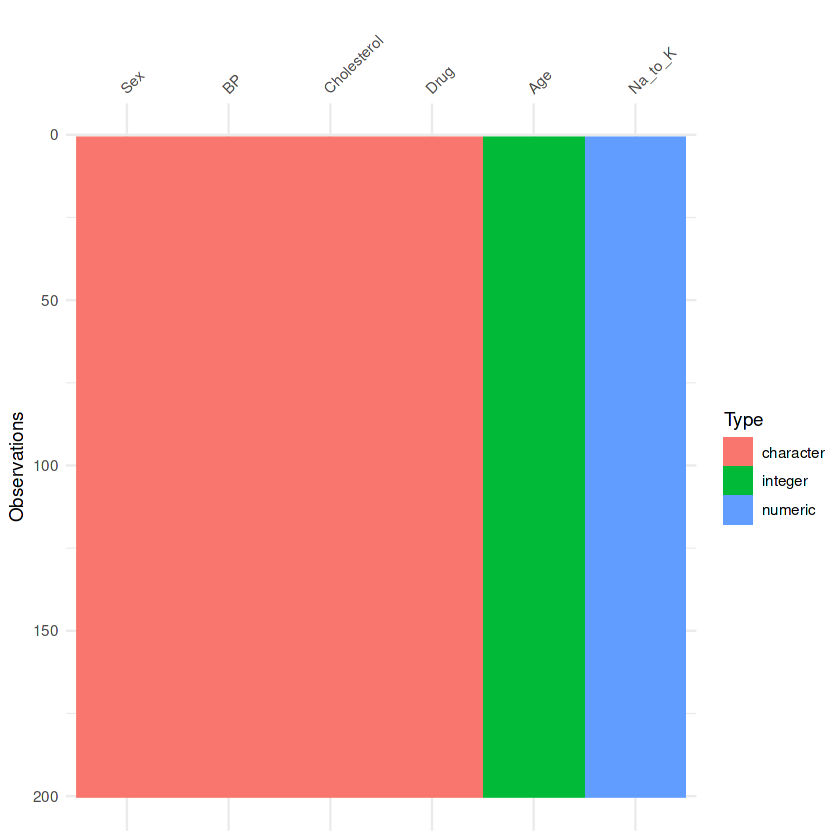

In [69]:
#Explore the data class structure visually
library(visdat)

vis_dat(data)

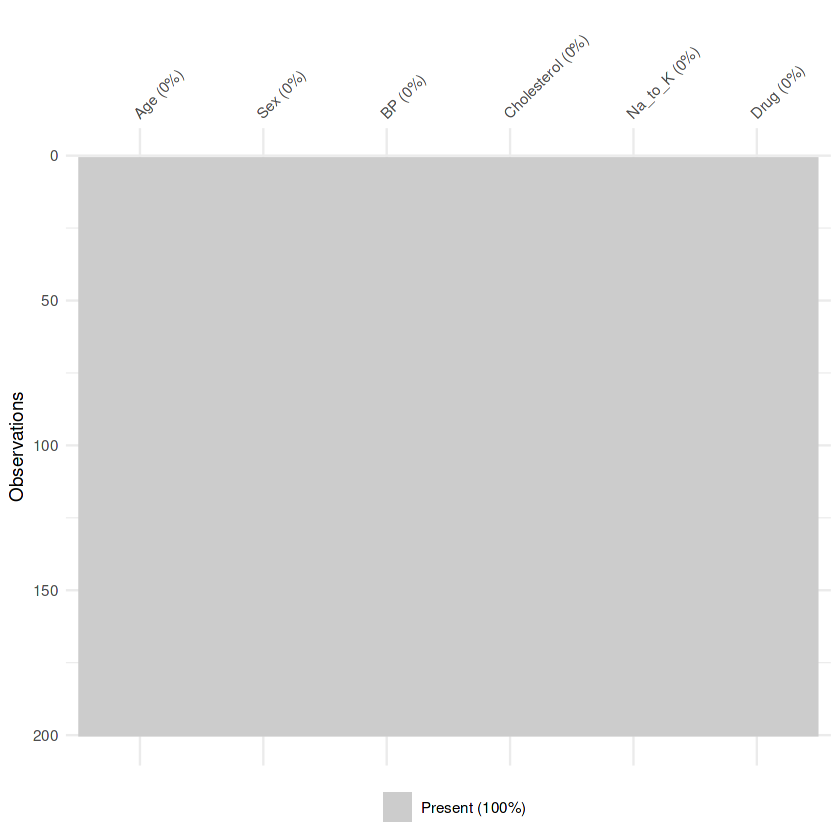

In [70]:
#Visualizing missing data
vis_miss(data, sort_miss = TRUE)

In [71]:
is.na(data) %>% colSums()

Age         Sex          BP Cholesterol     Na_to_K        Drug 
          0           0           0           0           0           0

## 3. Clean the dataset

In [72]:
#convert all character columns into factor
data <- data %>%
        mutate_if(is.character,as.factor)

In [73]:
glimpse(data)

Rows: 200
Columns: 6
$ Age         <int> 23, 47, 47, 28, 61, 22, 49, 41, 60, 43, 47, 34, 43, 74, 50…
$ Sex         <fct> F, M, M, F, F, F, F, M, M, M, F, F, M, F, F, F, M, M, M, F…
$ BP          <fct> HIGH, LOW, LOW, NORMAL, LOW, NORMAL, NORMAL, LOW, NORMAL, …
$ Cholesterol <fct> HIGH, HIGH, HIGH, HIGH, HIGH, HIGH, HIGH, HIGH, HIGH, NORM…
$ Na_to_K     <dbl> 25.355, 13.093, 10.114, 7.798, 18.043, 8.607, 16.275, 11.0…
$ Drug        <fct> drugY, drugC, drugC, drugX, drugY, drugX, drugY, drugC, dr…


## 2.2 EDA

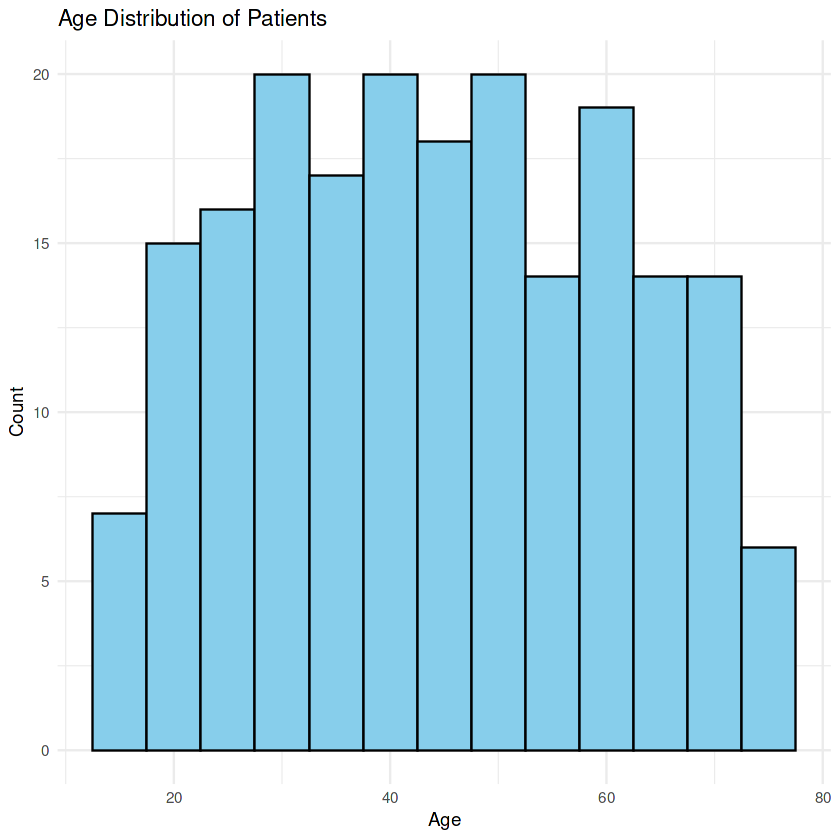

In [74]:
#Distribution of Age
ggplot(data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Age Distribution of Patients", x = "Age", y = "Count") +
  theme_minimal()

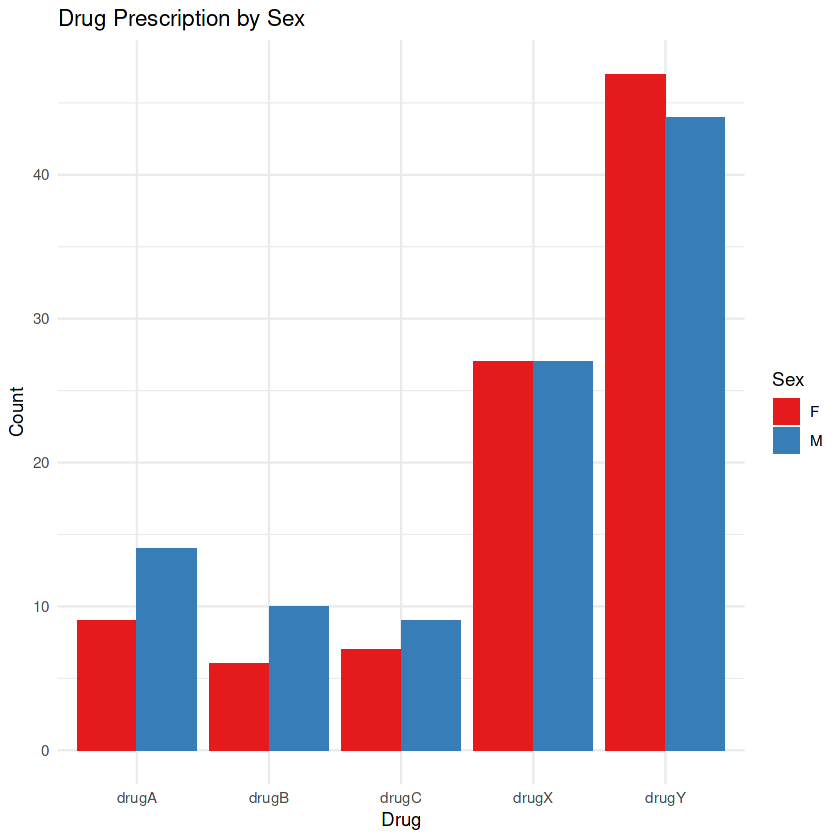

In [75]:
#Drug Prescription by Sex
ggplot(data, aes(x = Drug, fill = Sex)) +
  geom_bar(position = "dodge") +
  labs(title = "Drug Prescription by Sex", x = "Drug", y = "Count") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")

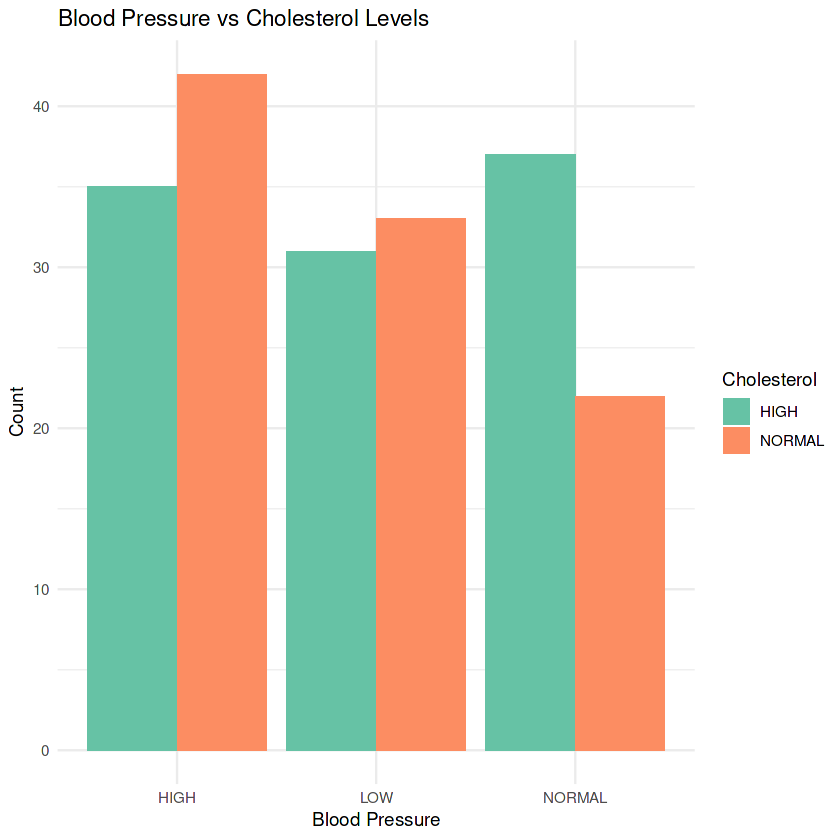

In [76]:
#Blood Pressure vs Cholesterol
ggplot(data, aes(x = BP, fill = Cholesterol)) +
  geom_bar(position = "dodge") +
  labs(title = "Blood Pressure vs Cholesterol Levels", x = "Blood Pressure", y = "Count") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

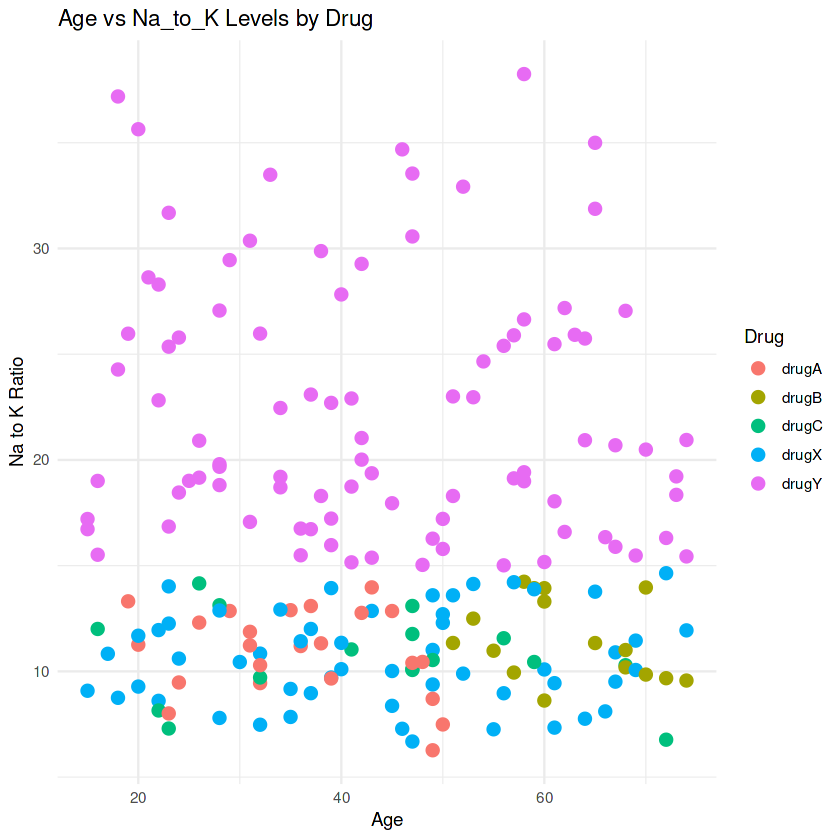

In [77]:
#Age and Na_to_K Levels by Drug
ggplot(data, aes(x = Age, y = Na_to_K, color = Drug)) +
  geom_point(size = 3) +
  labs(title = "Age vs Na_to_K Levels by Drug", x = "Age", y = "Na to K Ratio") +
  theme_minimal()

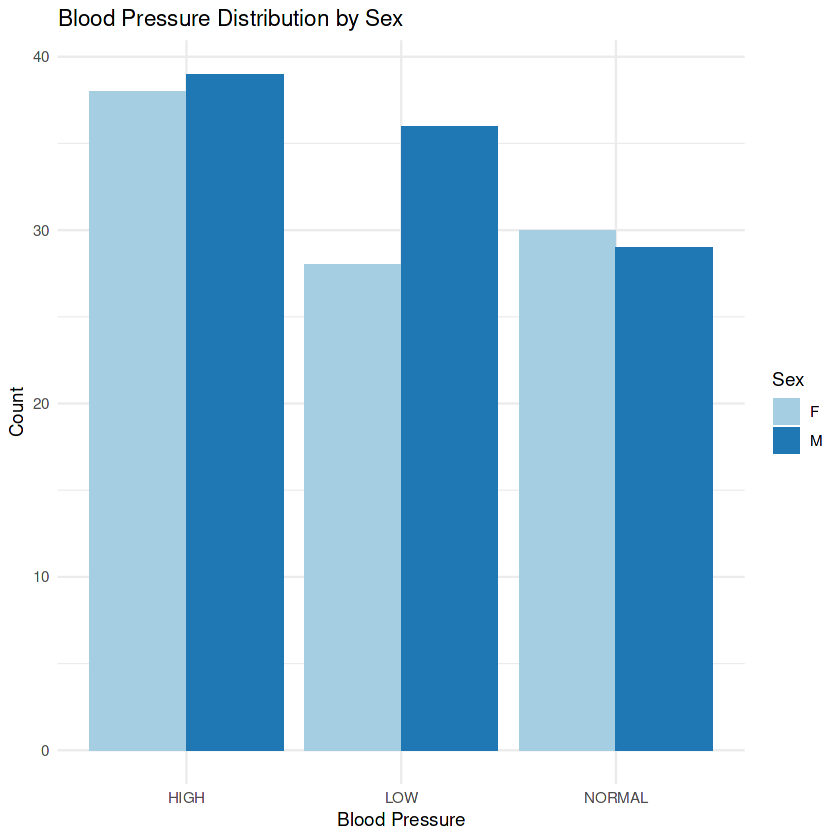

In [78]:
#Blood Pressure Distribution by Sex
ggplot(data, aes(x = BP, fill = Sex)) +
  geom_bar(position = "dodge") +
  labs(title = "Blood Pressure Distribution by Sex", x = "Blood Pressure", y = "Count") +
  theme_minimal() +
  scale_fill_brewer(palette = "Paired")

## 4.Create train/test set

In [79]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
set.seed(333)

In [81]:
split <- sample.split(data$Drug, SplitRatio = 0.8)
train_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

In [82]:
dim(train_data)

[1] 160   6

In [83]:
dim(test_data)

[1] 40  6

In [84]:
prop.table(table(train_data$Drug))


  drugA   drugB   drugC   drugX   drugY 
0.11250 0.08125 0.08125 0.26875 0.45625 

In [85]:
prop.table(table(test_data$Drug))


drugA drugB drugC drugX drugY 
0.125 0.075 0.075 0.275 0.450 

## 5. Build the model

In [86]:
library(rpart)
library(rpart.plot)

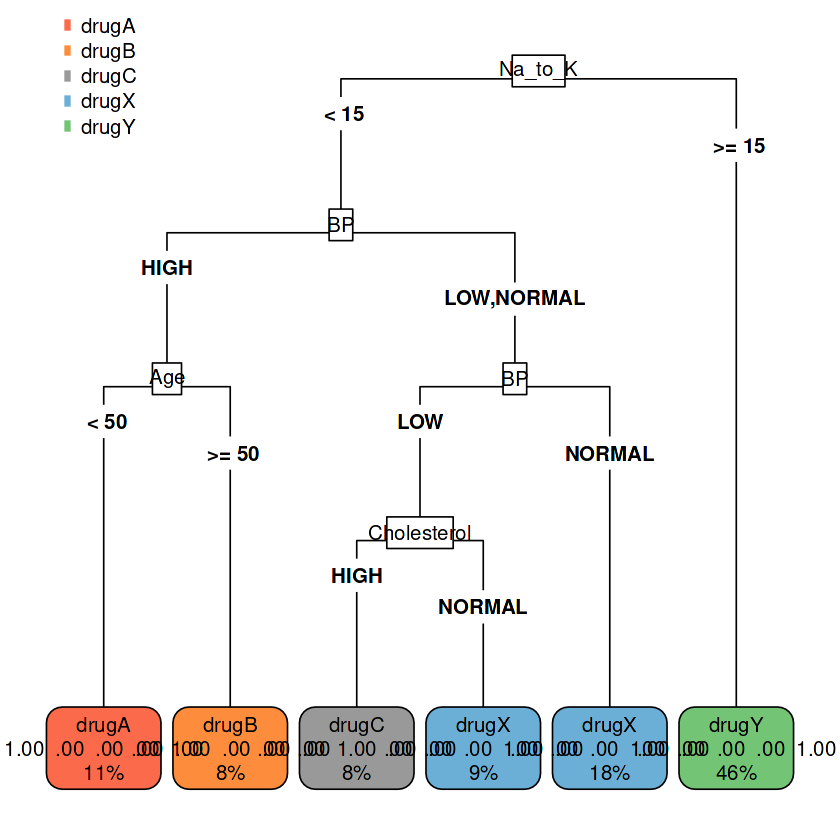

In [87]:
model <- rpart(Drug ~ ., data = train_data, method = 'class')
rpart.plot(model, extra = 104, type = 5, fallen.leaves = TRUE)

## 6.Make a prediction

In [88]:
predictions <- predict(model, test_data, type = 'class')

In [89]:
table_matrix <- table(test_data$Drug, predictions)
table_matrix

       predictions
        drugA drugB drugC drugX drugY
  drugA     4     1     0     0     0
  drugB     0     3     0     0     0
  drugC     0     0     3     0     0
  drugX     0     0     0    11     0
  drugY     0     0     0     0    18

## 7.Measure performance

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$


Where:

* TP = True Positives (correctly predicted positive values)
* TN = True Negatives (correctly predicted negative values)
* FP = False Positives (incorrectly predicted positive values)
* FN = False Negatives (incorrectly predicted negative values)

In [90]:
correct_predictions <- sum(diag(table_matrix))
total_predictions <- sum(table_matrix)
accuracy <- correct_predictions / total_predictions
cat("Accuracy:", accuracy)

Accuracy: 0.975

## 8.Tune the hyperparameters
 the first model performed very , hence there will be no hyperparemeter tuning